At first, I need to import everything what is necessary to make this project from few _Python_ libraries. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Box-Muller Transformation

I make a function, which let me use the Box-Muller formula (below).

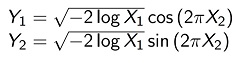

In [2]:
def Box_Muller(u1, u2, n):
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

Now, it's time to define our $N$, $U_{1}$ and $U_{2}$. 
10k samples should be enough to see trends:

In [3]:
n = 10000
u1 = np.random.random(n)
u2 = np.random.random(n)

_Box-Muller function_:

In [4]:
(x,y) = Box_Muller(u1, u2, n)

### Results

At first, we can see how $U_1$ and $U_2$ distribution looks. It shows us, how was the distribution of numbers before _Box-Muller_ transformation.

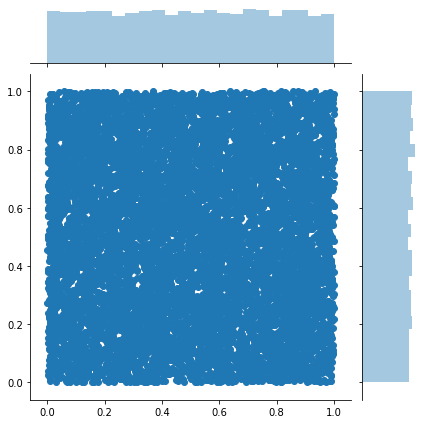

In [5]:
sns_plot=sns.jointplot(u1, u2, kind='scatter')

The distribution is definitely not normal, isn't it?

Now, let's see the distribution of numbers after _Box-Muller_ transformation:

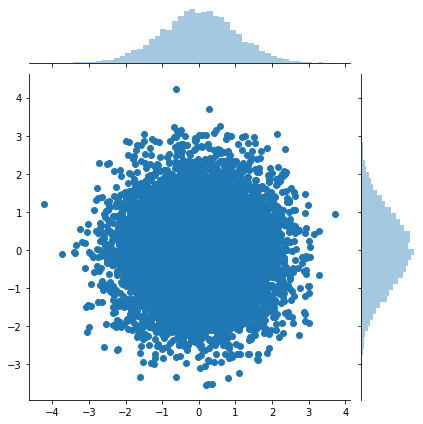

In [6]:
sns_plot=sns.jointplot(x, y, kind='scatter')

As we can see the distribution of numbers changed, it looks like that we can call it _**normal distribution**_. 

But are we sure..? We can also **test it!**

### Tests

There are many tests which check whether the distribution of data is normal or not, e.g.:
    * D'Agostino-Pearson
    * Kolmogorov-Smirnov

We can use both of them to check if Box-Muller generator truely works.

At first, we need to create hypothesis:

>$H_0$: _The distribution of numbers after Box-Muller transformation meets the conditions of a normal distribution._

>$H_A$: _The distribution of numbers after Box-Muller transformation doesn't meet the conditions of a normal distribution._

And our _alpha_  is:

>$\alpha$ = 0.05

Then, I make a normality test function:

In [7]:
def test_norm_bm(u1, u2, n):
    (x, y) = Box_Muller(u1, u2, n)
    stat_x, p_x_dp = stats.normaltest(x)
    stat_y, p_y_dp = stats.normaltest(y)
    D_x, p_x_ks = stats.kstest(x, 'norm')
    D_y, p_y_ks = stats.kstest(y, 'norm')
    p_value = {"p-value x":[p_x_dp, p_x_ks], "p-valye y":[p_y_dp, p_y_ks]}
    df = pd.DataFrame(data = p_value, index = ["D'Agostino-Pearson", "Kolmogorov-Smirnov"])
    return df

In [8]:
test_norm_bm(u1, u2, n)

,p-value x,p-valye y
D'Agostino-Pearson,0.328013,0.355682
Kolmogorov-Smirnov,0.882635,0.432672


_p-value_ > 0.05, so we have no argument to reject the null hypothesis. 

It means that tests confirmed that distribution of numbers after Box-Muller transformation _**meets conditions of a normal distribution**_.

The other method which let us check if distribution is normal is **quantile chart**. 

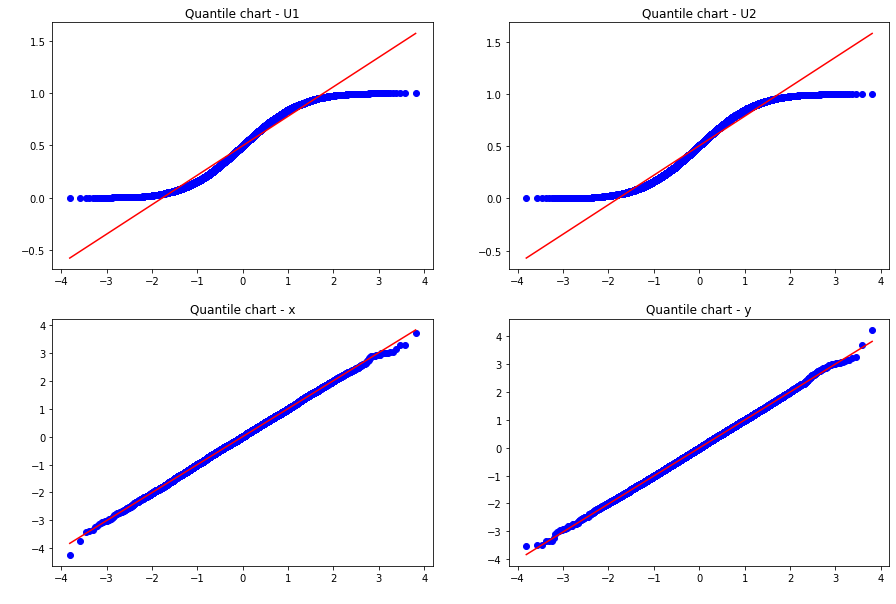

In [9]:
plt.figure(figsize=(15, 10))

plt.subplot(221) 
stats.probplot(u1, dist=stats.norm, plot=plt)
plt.title('Quantile chart - U1')
plt.xlabel(' ')
plt.ylabel(' ')

plt.subplot(222) 
stats.probplot(u2, dist=stats.norm, plot=plt)
plt.title('Quantile chart - U2')
plt.xlabel(' ')
plt.ylabel(' ')

plt.subplot(223)
stats.probplot(x, dist=stats.norm, plot=plt)
plt.title('Quantile chart - x')
plt.xlabel(' ')
plt.ylabel(' ')

plt.subplot(224) 
stats.probplot(y, dist=stats.norm, plot=plt)
plt.title('Quantile chart - y')
plt.xlabel(' ')
plt.ylabel(' ')

plt.show()

The interpretation of quantile charts is quite simple: the more points (blue ones) coincides with a line (red one), the more distribution meets the conditions of normal distribution. 
    
As we can see, in $U_1$ and $U_2$ charts lines of points don't coincide with a red line, what means that distributions of $U_1$ and $U_2$ are not normal. 
    
However, in $x$ and $y$ charts lines of points coincide with a red line. This means that distributions of $x$ and $y$ (after _Box-Muller transformation_) are normal distributions. 
    

### Conclusions:
_Above Box-Muller generator works correctly, what is confirmed by D'Agostino-Pearson, Kolmogorov-Smirnov tests and also by quantile charts._